In [258]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Chandan\Desktop\Shara\Price.csv")
df["Date"] = pd.to_datetime(df["Date"],format="%d-%m-%Y")

In [259]:
#For Shivamogga 
df = df[df["Branch"] == "Shivamogga"]

In [260]:
df.Product.value_counts()

df_Rashi = df[df["Product"]=="Rashi Idi"]
df_Rashi.reset_index(drop=False,inplace=True)

df_Gorabalu = df[df["Product"]=="Gorabalu"]
df_Gorabalu.reset_index(drop=False,inplace=True)

df_Hasa = df[df["Product"]=="Hasa"]
df_Hasa.reset_index(drop=False,inplace=True)


df_Bette = df[df["Product"]=="Bette"]
df_Bette.reset_index(drop=False,inplace=True)


df_newRashi = df[df["Product"]=="New Rashi Idi"]
df_newRashi.reset_index(drop=False,inplace=True)


df_oldRashi = df[df["Product"]=="Old Rashi Idi"]
df_oldRashi.reset_index(drop=False,inplace=True)


In [261]:
data = df_Rashi[["Date","Maxtrade_Price"]]

In [262]:
#indexing date
data.set_index('Date',inplace= True)

#Getting the missing dates
data =data['Maxtrade_Price'].resample('D', how='mean')
ts = data

C:\Users\Chandan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  


In [263]:
#Replacing missing days with the previous day's value.
ts.fillna(method='ffill',inplace=True)

C:\Users\Chandan\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=48730.826111, expected=46151.000000
predicted=46186.253840, expected=46151.000000
predicted=46043.758989, expected=46269.000000
predicted=46296.266800, expected=46269.000000
predicted=46302.342455, expected=46451.000000
predicted=46478.298031, expected=46451.000000
predicted=46487.718405, expected=46451.000000
predicted=46478.693726, expected=43009.000000
predicted=43037.790528, expected=43009.000000
predicted=42858.704296, expected=43009.000000
predicted=43030.785964, expected=43009.000000
predicted=43030.747487, expected=42419.000000
predicted=42440.601499, expected=42419.000000
predicted=42411.914558, expected=42419.000000
predicted=42439.642341, expected=42399.000000
predicted=42419.601117, expected=42399.000000
predicted=42418.595577, expected=41889.000000
predicted=41909.339518, expected=41889.000000
predicted=41884.490846, expected=40499.000000
predicted=40517.610250, expected=40499.000000
predicted=40444.774705, expected=40499.000000
predicted=40516.145266, expected=4

predicted=35072.372616, expected=40155.000000
predicted=40166.862351, expected=40155.000000
predicted=40447.962403, expected=36159.000000
predicted=36168.768389, expected=36159.000000
predicted=36267.129404, expected=36159.000000
predicted=36167.356238, expected=38599.000000
predicted=38610.012647, expected=38599.000000
predicted=38553.347171, expected=38599.000000
predicted=38610.655652, expected=38599.000000
predicted=38610.640105, expected=36469.000000
predicted=36478.263809, expected=36469.000000
predicted=36526.770280, expected=36469.000000
predicted=36477.693182, expected=37199.000000
predicted=37208.521005, expected=37199.000000
predicted=37192.131816, expected=36161.000000
predicted=36169.467577, expected=36161.000000
predicted=36195.327096, expected=36699.000000
predicted=36707.824418, expected=36699.000000
predicted=36693.513447, expected=36699.000000
predicted=36707.959765, expected=36239.000000
predicted=36247.411704, expected=36239.000000
predicted=36259.667292, expected=3

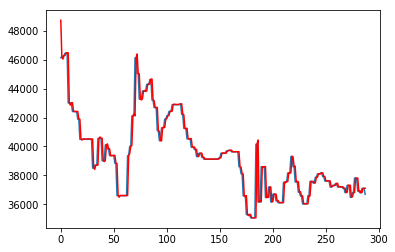

In [264]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
series = ts 
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,0))
	model_fit = model.fit(disp=-1)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(predictions,test)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


# Residuals check

In [265]:
residuals = [test[i]-predictions[i] for i in range(len(predictions))]

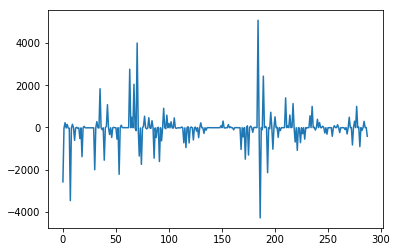

In [266]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(residuals)

In [267]:
residuals = [residuals[i][0] for i in range(0,len(residuals))]

In [268]:
model_fit.resid

array([-8.33175192e+00,  5.16666811e+01, -8.51033397e+00, -7.16427808e+00,
       -1.40852187e+03, -8.79112798e+00,  4.45800901e+02, -8.42840367e+00,
        3.53474649e+02, -8.45436750e+00, -5.79940501e-01, -5.52187345e+00,
       -8.52129648e+00, -8.45399368e+00, -8.52187345e+00, -3.78521873e+02,
       -8.59303358e+00, -1.68937116e+01,  1.88147813e+03, -8.15837984e+00,
       -1.48575762e+03, -8.81420694e+00, -2.13914290e+02, -8.55476097e+00,
       -1.23910203e+01, -1.70521873e+02, -8.55303005e+00, -2.09187381e+02,
       -8.55976141e+00,  1.37020688e+02, -8.49302475e+00, -5.12788501e+00,
       -6.78521873e+02, -8.65073098e+00,  6.63183115e+01, -8.50456423e+00,
       -1.46485480e+02, -8.54879891e+00, -1.16895960e+01, -1.85218735e+01,
       -8.52379670e+00, -2.97481393e+01, -8.52591227e+00, -3.48997032e+02,
       -8.58726384e+00, -1.62149139e+01, -1.77521873e+02, -8.55437632e+00,
       -3.72345767e+02, -8.59111033e+00, -3.26667446e+02, -8.58149410e+00,
       -1.55361162e+01,  

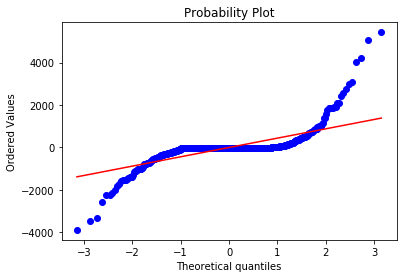

In [269]:
import numpy as np 
import pylab 
import scipy.stats as stats


stats.probplot(model_fit.resid, dist="norm", plot=pylab)
pylab.show()

(array([  3.,   4.,  16.,  90., 696.,  17.,  11.,   3.,   2.,   2.]),
 array([-3889.37515896, -2956.98983041, -2024.60450186, -1092.21917331,
         -159.83384476,   772.55148379,  1704.93681235,  2637.3221409 ,
         3569.70746945,  4502.092798  ,  5434.47812655]),
 <a list of 10 Patch objects>)

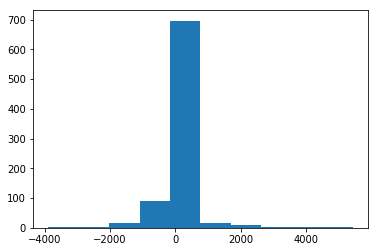

In [270]:
plt.hist(model_fit.resid)

C:\Users\Chandan\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  if __name__ == '__main__':


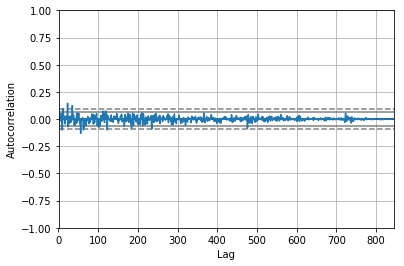

In [271]:
from random import gauss
from random import seed
from pandas import Series
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot
# seed random number generator

# autocorrelation
autocorrelation_plot(model_fit.resid)
pyplot.show()